##OOPs concepts

1. Abstraction
2. Polymorphism
3. Encapsulation
4. Inheritance

## Classes and Objects

1. Classes are blueprints

properties of an object --> variables in the object like engine, doors, etc.
behaviour of an object --> functions which the object can call like driving, braking

In [ ]:
class Dog:

  species = "canine"

  def __init__(self,name,age):
    self.name = name ##--? buddy.name = buddy
    self.age = age ##--> buddy.age = 4

  # instance methods

  def description(self):
    return f"{self.name} is {self.age} years old"


In [ ]:
buddy = Dog("buddy",4)

In [ ]:
buddy.species

'canine'

In [ ]:
miles = Dog("miles",2)

In [ ]:
miles.age

2

In [ ]:
buddy.description()

'buddy is 4 years old'

In [ ]:
class Person():

  def __init__(self,name,id):
    self.name = name
    self.id = id

  def display(self):
    print(self.name, self.id)


In [ ]:
emp = Person("Venkat", 100)

In [ ]:
emp.id

100

In [ ]:
class Emp(Person):
  def Print(self):
    print("emp class called")


In [ ]:
emp2 = Emp("Ajay",102)

In [ ]:
emp2.Print()

emp class called


In [ ]:
isinstance(emp2,Person)

True

In [ ]:
class abstr:
  pass



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

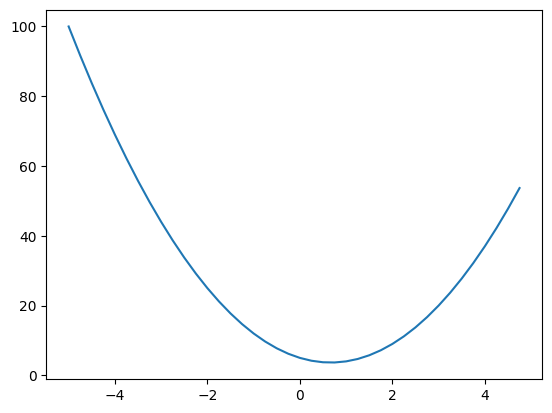

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)
plt.show()

In [ ]:
h = 0.00001
x = -3.0
(f(x+h) - f(x)) / h

-21.999970000052823

In [ ]:
a = 2.0
b =-3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001
a = 2.0
b =-3.0
c = 10.0

d1 = a*b + c

c += h

d2 = a*b + c

print('slope', (d2 - d1)/h)

slope 0.9999999999976694


In [1]:
import math
class Value:

  def __init__(self,data, _children=(),_op="",label=''):
    self.data = data # a.data = 4
    self._prev = set(_children)
    self._op = _op
    self._backward = lambda:None
    self.label=label
    self.grad = 0.0


  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self,other):
    other = other if isinstance(other,Value) else Value(other)
    out = Value(self.data + other.data, (self,other),'+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad

    out._backward = _backward
    return out

  def __radd__(self,other):
    return self + other

  def __truediv__(self,other):
    out = self * other**-1
    return out

  def __pow__(self,other):
      assert isinstance(other,(int,float))
      out = Value(self.data**other,(self,),f'**{other}')

      def _backward():
          self.grad += (other * self.data**(other-1)) * out.grad
      out._backward = _backward

      return out

  def __sub__(self,other):
    return self + (-other)

  def __neg__(self):
    return self * -1


  def __mul__(self,other):
    other = other if isinstance(other,Value) else Value(other)
    out = Value(self.data * other.data, (self,other),'*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward =  _backward

    return out

  def __rmul__(self,other):
    return self * other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x)-1)/(math.exp(2*x)+1 )
    out = Value(t,(self,),'tanh')

    def _backward():
      self.grad += (1-t**2) * out.grad
    out._backward = _backward
    return out

  def exp(self):
      x = self.data
      out = Value(math.exp(x),(self,),'exp')

      def _backward():
          self.grad += out.data * out.grad
      out._backward = _backward

      return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
        node._backward()

In [3]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')

e = a*b; e.label='e'
d = e +c
d.label = 'd'
f = Value(-2.0,label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
a = Value(2.0,label='a')
b = Value(4.0,label='b')

a/b = a * b**-1

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-4-a507a545b920>, line 4)

In [2]:
from graphviz import Digraph

def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={"rankdir":"LR"})

    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value create a rectangular node
        dot.node(name=uid,label="{%s | data %.4f | grad %.4f }"%( n.label, n.data, n.grad),shape="record")

        if n._op:###fake operation nodes
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot

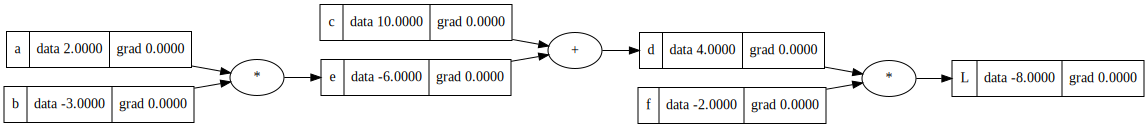

In [4]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.grad += 0.01 * b.grad
c.grad += 0.01 * c.grad
f.grad += 0.01 * f.grad

e = a* b
d = e + c
L = d * f

print(L.data)


-7.640000000000001


In [ ]:
a.grad = 6.0
b.grad = -4.0

In [ ]:
h = 0.0001

a = Value(2.0); a.label='a'
b = Value(-3.0); b.label='b'
c = Value(10.0); c.label='c'

e = a*b; e.label = 'e'
d = e+c; d.label='d'
f = Value(-2.0,label='f')
L = d*f; L.label = 'L'

L1 = L.data

a = Value(2.0); a.label='a'
b = Value(-3.0); b.label='b'
c = Value(10.0); c.label='c'

e = a*b; e.label = 'e'
e.data += h
d = e+c; d.label='d'


f = Value(-2.0,label='f')
L = d*f; L.label = 'L'

L2 = L.data

print((L2-L1)/h)

-1.9999999999953388


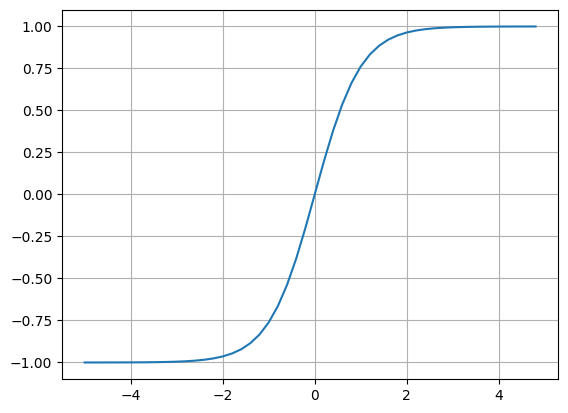

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid()

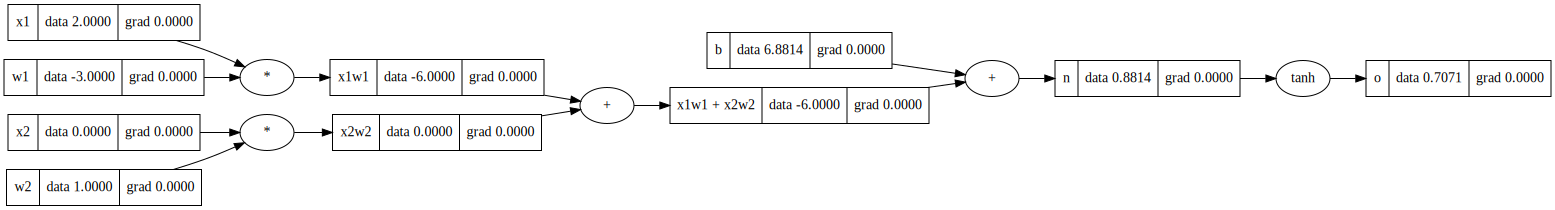

In [5]:
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
#bias
b = Value(6.88137358701,label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
draw_dot(o)

In [ ]:
o.grad = 1.0
o.backward()


In [ ]:
x1w1._backward()
x2w2._backward()

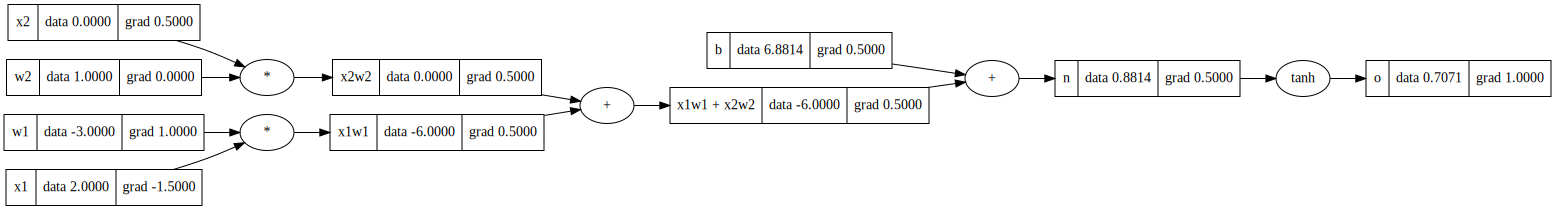

In [ ]:
draw_dot(o)

In [ ]:
x2.grad = 0.5 * w2.data
w2.grad = 0.5 * x2.data
x1.grad = 0.5 * w1.data
w1.grad = 0.5 * x1.data


In [ ]:
o.grad = 1.0
n.grad = 0.5

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

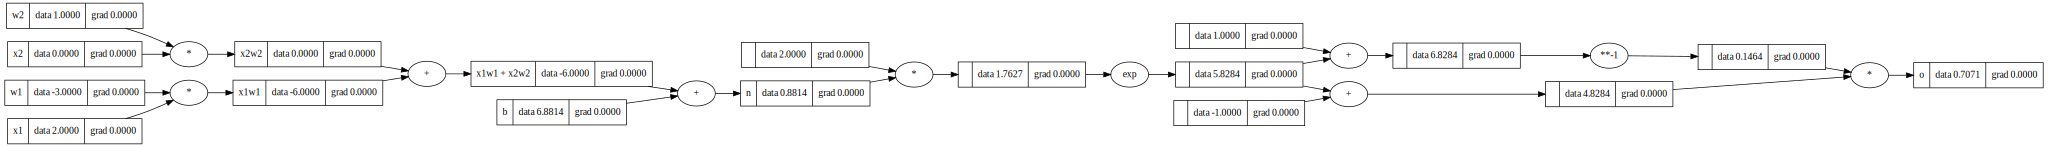

In [ ]:
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# weights
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
#bias
b = Value(6.88137358701,label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e -1)/(e+1) ; o.label = 'o'
draw_dot(o)

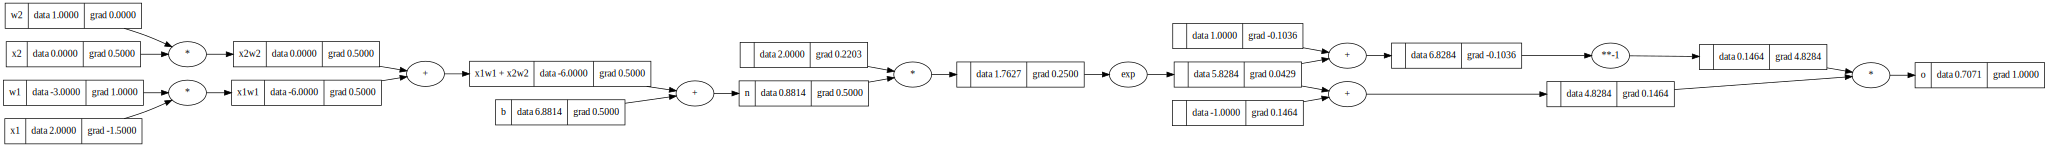

In [ ]:
o.grad = 1.0
o.backward()
draw_dot(o)

In [6]:
import torch

x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True

b = torch.Tensor([6.88]).double(); b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('x2',x2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())
print('w2',w2.grad.item())


0.7064193777288968
x2 0.5009716627691182
x1 -1.5029149883073547
w1 1.0019433255382364
w2 0.0


In [7]:
import random
class Neuron:

  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out = act.tanh()
    return out

  def parameters(self):
      return self.w + [self.b]

class Layer:
  def __init__(self,nin,nout):
      self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
      outs = [n(x) for n in self.neurons]
      return outs[0] if len(outs) == 1 else outs

  def parameters(self):
      return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self,nin,nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
      for layer in self.layers:
          x = layer(x)
      return x

  def parameters(self):
      return [p for layer in self.layers for p in layer.parameters()]


In [8]:
x = [2.0, 3.0, -4.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.634078748555759)

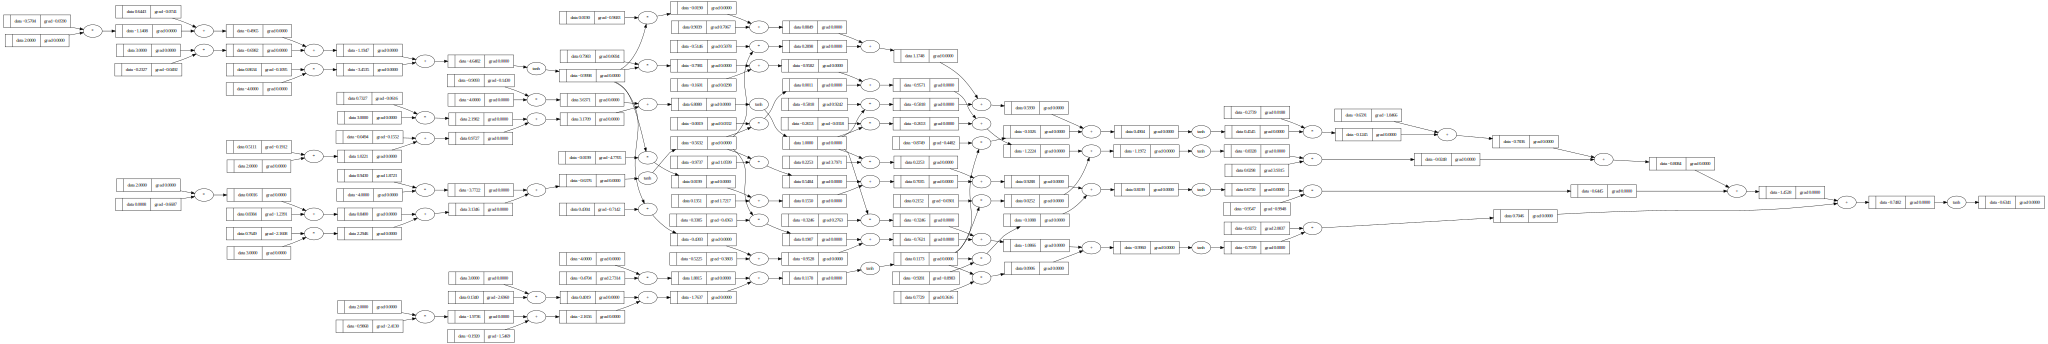

In [15]:
draw_dot(n(x))

In [10]:
xs = [[2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]]

ys = [1.0,-1.0,-1.0,1.0]

ypred = [n(x) for x in xs]
ypred

[Value(data=-0.12943670782374722),
 Value(data=-0.5316244109555698),
 Value(data=0.0007656642074065806),
 Value(data=-0.19500882160829777)]

In [11]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
loss

Value(data=3.9245809677706056)

In [12]:
loss.backward()

In [23]:
n.layers[0].neurons[0].w[1].data

-0.23222941202218803

In [16]:
len(n.parameters())

41

In [21]:
for p in n.parameters():
  p.data += -0.01 * p.grad

In [24]:
n.layers[0].neurons[0].w[1].data

-0.23222941202218803

In [28]:
xs = [[2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]]

ys = [1.0,-1.0,-1.0,1.0]

In [29]:
for k in range(20):
    #forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))

    #backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    #update
    for p in n.parameters():
        p.data += -0.08 * p.grad

    print(k, loss.data)

0 0.20410257093770645
1 0.12474853017493225
2 0.0907250126481773
3 0.07138507532658832
4 0.05882267784396239
5 0.049981963016028155
6 0.04341491328766072
7 0.03834214851103174
8 0.034305391935846315
9 0.031016963352362335
10 0.028286913573732482
11 0.02598466379785297
12 0.024017440449369494
13 0.022317492696771385
14 0.02083417727362695
15 0.019528873777220346
16 0.018371614208486074
17 0.017338787454337024
18 0.016411538446395445
19 0.01557462824831849


In [30]:
ypred

[Value(data=0.9552708140668691),
 Value(data=-0.9431540909764727),
 Value(data=-0.9322725820544708),
 Value(data=0.9241352014449496)]